In [40]:
## Load Required Pacackages
# Import pandas for reading datasets
import pandas as pd
# Import numpy for any computation-like processes
import numpy as np
# Import matplotlib for any graphs
import matplotlib.pyplot as plt
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Import grid search 
from sklearn.model_selection import GridSearchCV
# Import simple imputer 
from sklearn.impute import SimpleImputer
# Import MinMax scaler for normalization and LabelEncoder
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
# Import pipline
from sklearn.pipeline import Pipeline
# Import r2_score for evaluting regression
from sklearn.metrics import r2_score
# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# Import KNN regressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_breast_cancer

In [41]:
# Read iris dataset
iris = pd.read_csv('iris.csv')
# View head
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# Show dataset info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
# Check outcome distrbution
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [44]:
lapenc = LabelEncoder()
iris['species'] = lapenc.fit_transform(iris['species'])

In [45]:
# Split into predictiors and outcome
X = iris.drop('species', axis = 1)
y = iris['species']

In [46]:
# Split into training and testing subsets with stratification over y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

## KNeighborsClassifier

In [47]:
# Intiate a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit over training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
# Print overall accuracy
knn.score(X_test, y_test)

1.0

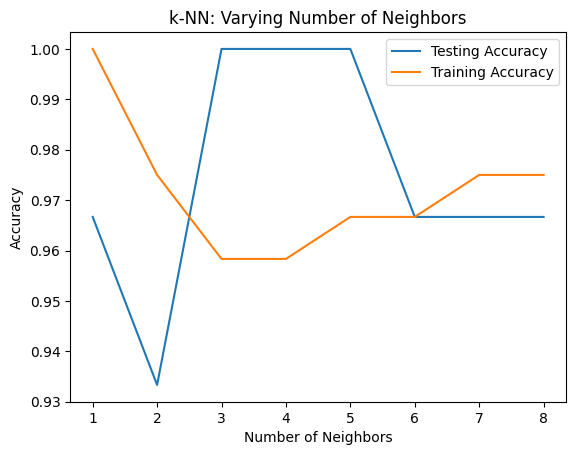

In [49]:
# Let's implement Elbow method
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## SVC

In [50]:
# Import SVC classifier 
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', gamma='scale')
# Fit the training data
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
# Use classifier to make predictions
y_pred = svclassifier.predict(X_test)

In [52]:
# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [53]:
# Let's try different kernels with GridSearch
param_dist = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
             'C': [0.01, 0.1, 0.5, 1, 3, 7],
             'gamma':['scale','auto']}
# Intiate GridSearch
svm_gs = GridSearchCV(svclassifier, param_dist, cv=6)

In [54]:
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 3, 7],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [55]:
# Print the tuned parameters and score
print("Tuned SVM Parameters: {}".format(svm_gs.best_params_))
print("Best score is {}".format(svm_gs.best_score_))

Tuned SVM Parameters: {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Best score is 0.9916666666666667


In [56]:
svm_gs.score(X_test,y_test)

1.0

## Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
treeclf = DecisionTreeClassifier(max_depth=100)
treeclf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=100)

In [62]:
# Use classifier to make predictions
y_pred_tree = svclassifier.predict(X_test)

In [63]:
# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

